# CAPSTONE PROJECT - 8

### Domain: 
#### Financial Services
### Title:
#### Exploratory Data Analysis and Credit Assessment in Financial Services

### About:
#### Finance is a field that is concerned with the allocation (investment) of assets and liabilities over space and time, often under conditions of risk or uncertainty. Finance can also be defined as the art of money management. Participants in the market aim to price assets based on their risk level, fundamental value, and their expected rate of return.
#### The dataset consists of customer information on L&T financial services. It is a finance dataset, which consists of customers’ demographics, loans disbursed, asset cost being purchased, and the customers’ previous accounts and loan histories. The dataset also consists of the state and branch id of L&T from where the loan was disbursed and the customer’s account history. It also contains the CNS score and score description provided by the Credit Bureaus of India.
#### It is a challenge for any financial service to target the right people for disbursing the loan. The credit team must analyze various details like CIBIL score, payment history (if available), credit history, geographical location, profession, income, age, education, etc. of the customers. This will help in understanding whether the person is capable of paying back the loan amount. Which in turn reduces its NPAs and increases its profitability.
#### You need to assess what data is available and perform some exploratory and descriptive analytics to identify interesting and useful patterns, trends, and insights.


## CheckPoint 1

#### Task 1.1 Data manipulation and Visualization using Python
#### Task 1.2 Exploratory Data Analysis & Statistical Analysis

## Task 1.1 Data manipulation and Visulization using Python

### Step A & B
- Load the dataset: Import the dataset into a Python environment (e.g., using pandas library) and create a data frame.

- Data exploration: Perform initial exploration of the dataset to gain insights into its structure and content. Use functions such as .head(), .info(), .describe(), and .shape to understand the data's dimensions, variable types, and summary statistics.

In [79]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install plotly
! pip install scikit-learn
! pip install openpyxl
! pip install imblearn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Importing the Packages

In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import scipy.stats as st
from scipy import stats
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

#### Loading the datasets into dataframe

In [81]:
loan_details = pd.read_csv("Loan_Details_transactions.csv")
df2 = pd.read_csv("Loan_status_mapping.csv")
branch_id = pd.read_csv("Branch_ID_Master.csv")
postal_code = pd.read_excel("Postal_Code_Master.xlsx" )
city_master = pd.read_excel("City_Master.xlsx")
region_master = pd.read_excel("Region_Master.xlsx")
state_master = pd.read_excel("State_Master.xlsx")
state_region = pd.read_excel("State_Region_Mapping.xlsx")
df3 = df2.drop(['Loan_Id'],axis = 1)

In [82]:
merged_df = pd.merge(loan_details, city_master, on=['City_Code', 'State_Code'], how='left')
merged_df1 = pd.merge(merged_df,state_master, on=['State_Code'], how='left')
merged_df2 = pd.merge(merged_df1,branch_id, on=['Branch_Id'], how='left')
merged_df3 = pd.merge(merged_df2,state_region[['Region_ID','State_Code']], on=['State_Code'], how='left')

loan_details = pd.concat([merged_df3,df3],axis=1)
loan_details

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,City_Name,State_Name,Region_Code,Region_ID,Loan_Default
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,0,0,0,0yrs 0mon,0,Mumbai,Maharashtra,R2,R4,0
1,2,48749,69303,72.15,67,CT03,ST24,600020,01-01-1991,Salaried,...,0,783,0,2yrs 6mon,0,Chennai,Tamil Nadu,R2,R2,0
2,3,55348,66340,85.00,2,CT13,ST04,801110,16-08-1993,Self employed,...,0,0,0,0yrs 0mon,0,Patna,Bihar,R3,R3,1
3,4,48849,64133,77.96,217,CT06,ST22,302029,01-01-1989,Self employed,...,0,0,0,0yrs 0mon,0,Jaipur,Rajasthan,R1,R1,0
4,5,40394,59386,70.72,74,CT03,ST24,600020,31-12-1974,Self employed,...,0,14,1,3yrs 1mon,1,Chennai,Tamil Nadu,R2,R2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,CT03,ST24,600020,14-12-1982,Self employed,...,0,650,0,5yrs 10mon,1,Chennai,Tamil Nadu,R3,R2,0
23311,23312,78879,122878,65.11,5,CT15,ST20,751022,03-07-1993,Salaried,...,0,680,0,0yrs 9mon,0,Bhubaneshwar,Odisha,R3,R3,0
23312,23313,49349,67695,73.86,48,CT22,ST14,453551,01-01-1994,Self employed,...,0,825,0,2yrs 3mon,0,Indore,Madhya Pradesh,R2,NaN,0
23313,23314,70897,84400,86.00,2,CT03,ST24,600020,10-10-1982,Self employed,...,0,657,0,0yrs 6mon,2,Chennai,Tamil Nadu,R3,R2,0


## Data Exploration

In [83]:
loan_details.describe()

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,Postal_Code,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Loan_Default
count,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.0,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000
mean,11658.000000,54297.647309,75842.182887,74.701607,72.079262,505937.177439,1.0,0.845078,0.075531,0.141068,0.023161,0.002059,291.234956,0.100622,0.205790,0.219858
std,6730.605099,13061.877434,18988.525635,11.462722,69.095008,204520.532113,0.0,0.361838,0.264252,0.348099,0.150418,0.045328,338.490214,0.388782,0.699901,0.414159
min,1.000000,13369.000000,37230.000000,17.130000,1.000000,110039.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5829.500000,46949.000000,65629.000000,68.830000,13.000000,391510.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11658.000000,53759.000000,70929.000000,76.710000,61.000000,524225.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17486.500000,60379.000000,79354.500000,83.630000,121.000000,680503.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,679.000000,0.000000,0.000000,0.000000
max,23315.000000,592460.000000,715186.000000,94.980000,261.000000,834008.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,7.000000,23.000000,1.000000


In [84]:
loan_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Loan_Id                              23315 non-null  int64  
 1   Disbursed_Amount                     23315 non-null  int64  
 2   Asset_Cost                           23315 non-null  int64  
 3   ltv                                  23315 non-null  float64
 4   Branch_Id                            23315 non-null  int64  
 5   City_Code                            23315 non-null  object 
 6   State_Code                           23315 non-null  object 
 7   Postal_Code                          23315 non-null  int64  
 8   Date_of_Birth                        23315 non-null  object 
 9   Employment_Type                      22545 non-null  object 
 10  DisbursalDate                        23315 non-null  object 
 11  MobileNo_Avl_Flag           

In [85]:
loan_details.shape

(23315, 26)

#### All the numeric data columns

In [86]:
numeric_type = loan_details.select_dtypes(include=['int64','float64']).columns
print(pd.DataFrame(numeric_type))

                                      0
0                               Loan_Id
1                      Disbursed_Amount
2                            Asset_Cost
3                                   ltv
4                             Branch_Id
5                           Postal_Code
6                     MobileNo_Avl_Flag
7                           Aadhar_flag
8                              PAN_flag
9                          VoterID_flag
10                         Driving_flag
11                        Passport_flag
12                    PERFORM_CNS.SCORE
13  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
14                      NO.OF_INQUIRIES
15                         Loan_Default


#### All the catagorical data columns

In [87]:
objects_type = loan_details.select_dtypes(include='object').columns
print(pd.DataFrame(objects_type))

                       0
0              City_Code
1             State_Code
2          Date_of_Birth
3        Employment_Type
4          DisbursalDate
5  CREDIT.HISTORY.LENGTH
6              City_Name
7             State_Name
8            Region_Code
9              Region_ID


## Data Cleaning
#### Checking for any duplicate values

In [88]:
loan_details[loan_details.duplicated].sum()

Loan_Id                                  0
Disbursed_Amount                         0
Asset_Cost                               0
ltv                                    0.0
Branch_Id                                0
City_Code                                0
State_Code                               0
Postal_Code                              0
Date_of_Birth                            0
Employment_Type                          0
DisbursalDate                            0
MobileNo_Avl_Flag                        0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS.SCORE                        0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      0
CREDIT.HISTORY.LENGTH                    0
NO.OF_INQUIRIES                          0
City_Name                                0
State_Name                               0
Region_Code

#### Checking for missing values under each column

In [89]:
loan_details.isnull().sum()

Loan_Id                                   0
Disbursed_Amount                          0
Asset_Cost                                0
ltv                                       0
Branch_Id                                 0
City_Code                                 0
State_Code                                0
Postal_Code                               0
Date_of_Birth                             0
Employment_Type                         770
DisbursalDate                             0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS       0
CREDIT.HISTORY.LENGTH                     0
NO.OF_INQUIRIES                           0
City_Name                                 0
State_Name                      

In [90]:
# Total missing values
loan_details.isnull().sum().sum()

np.int64(4727)

In [91]:
# Overall Percentage of missing values 
(loan_details.isnull().sum().sum()/len(loan_details))*100

np.float64(20.27450139395239)

In [92]:
# Replacing the missing value with the mode 
loan_details['Employment_Type'].fillna(loan_details['Employment_Type'].mode()[0],inplace=True)
loan_details['Region_ID'].fillna(loan_details['Region_ID'].mode()[0],inplace=True)

In [93]:
loan_details.isnull().sum()

Loan_Id                                0
Disbursed_Amount                       0
Asset_Cost                             0
ltv                                    0
Branch_Id                              0
City_Code                              0
State_Code                             0
Postal_Code                            0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
City_Name                              0
State_Name                             0
Region_Code                            0
Region_ID       

## Univariate Analysis

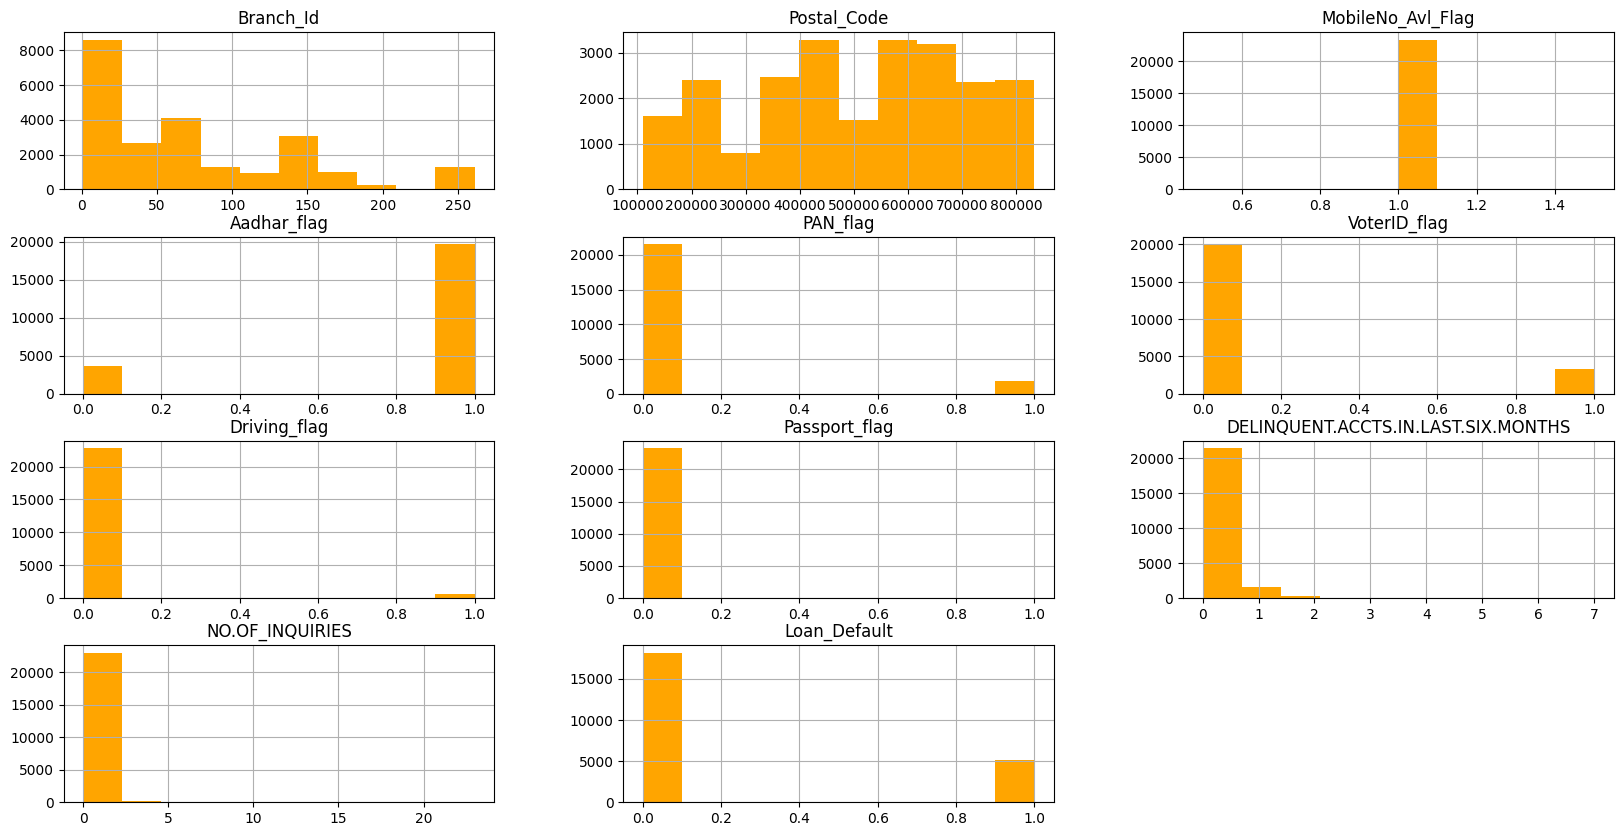

In [94]:
univariate = loan_details.drop(['Loan_Id','Disbursed_Amount','Asset_Cost','ltv','Date_of_Birth','DisbursalDate',
         'CREDIT.HISTORY.LENGTH', 'PERFORM_CNS.SCORE'],axis = 1)
univariate.hist(figsize=(20,10),color = 'orange')
plt.show()

## Bivariate Analysis

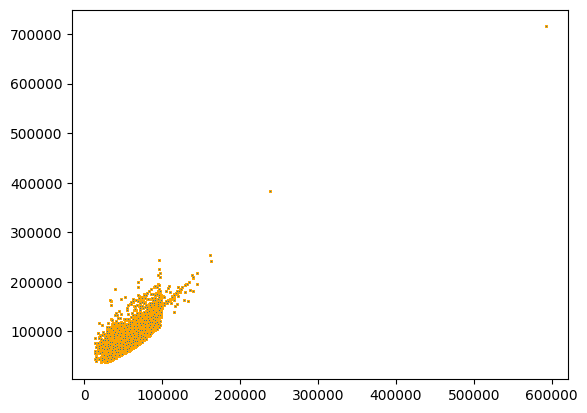

In [95]:
# constructing scatter plot for disbursed amount and asset cost

plt.scatter(loan_details['Disbursed_Amount'] , loan_details['Asset_Cost'],linewidths = 0.71,
            marker ="s",edgecolor ="orange",s = 1)
plt.show()

<Axes: >

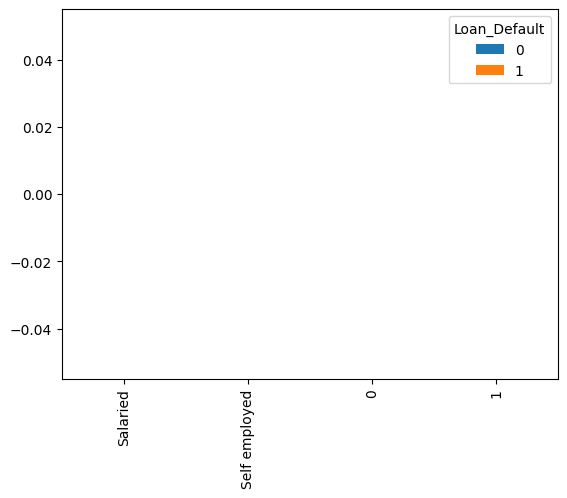

In [96]:
var =pd.crosstab(loan_details['Employment_Type'], loan_details['Loan_Default'])
var.div(var.sum(0).astype(float),axis=0).plot(kind="bar",stacked=True )

<Axes: xlabel='Aadhar_flag'>

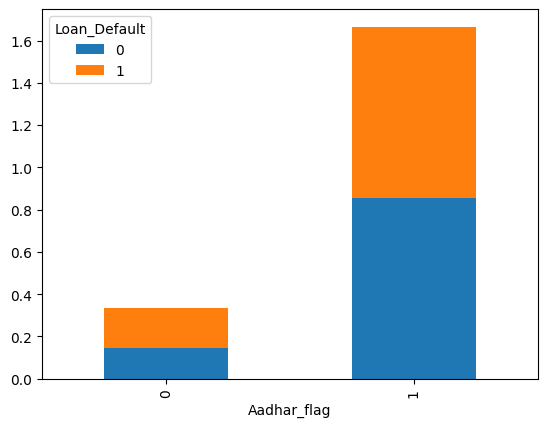

In [97]:
var =pd.crosstab(loan_details['Aadhar_flag'], loan_details['Loan_Default'])
var.div(var.sum(0).astype(float),axis=1).plot(kind="bar",stacked=True )

<Axes: >

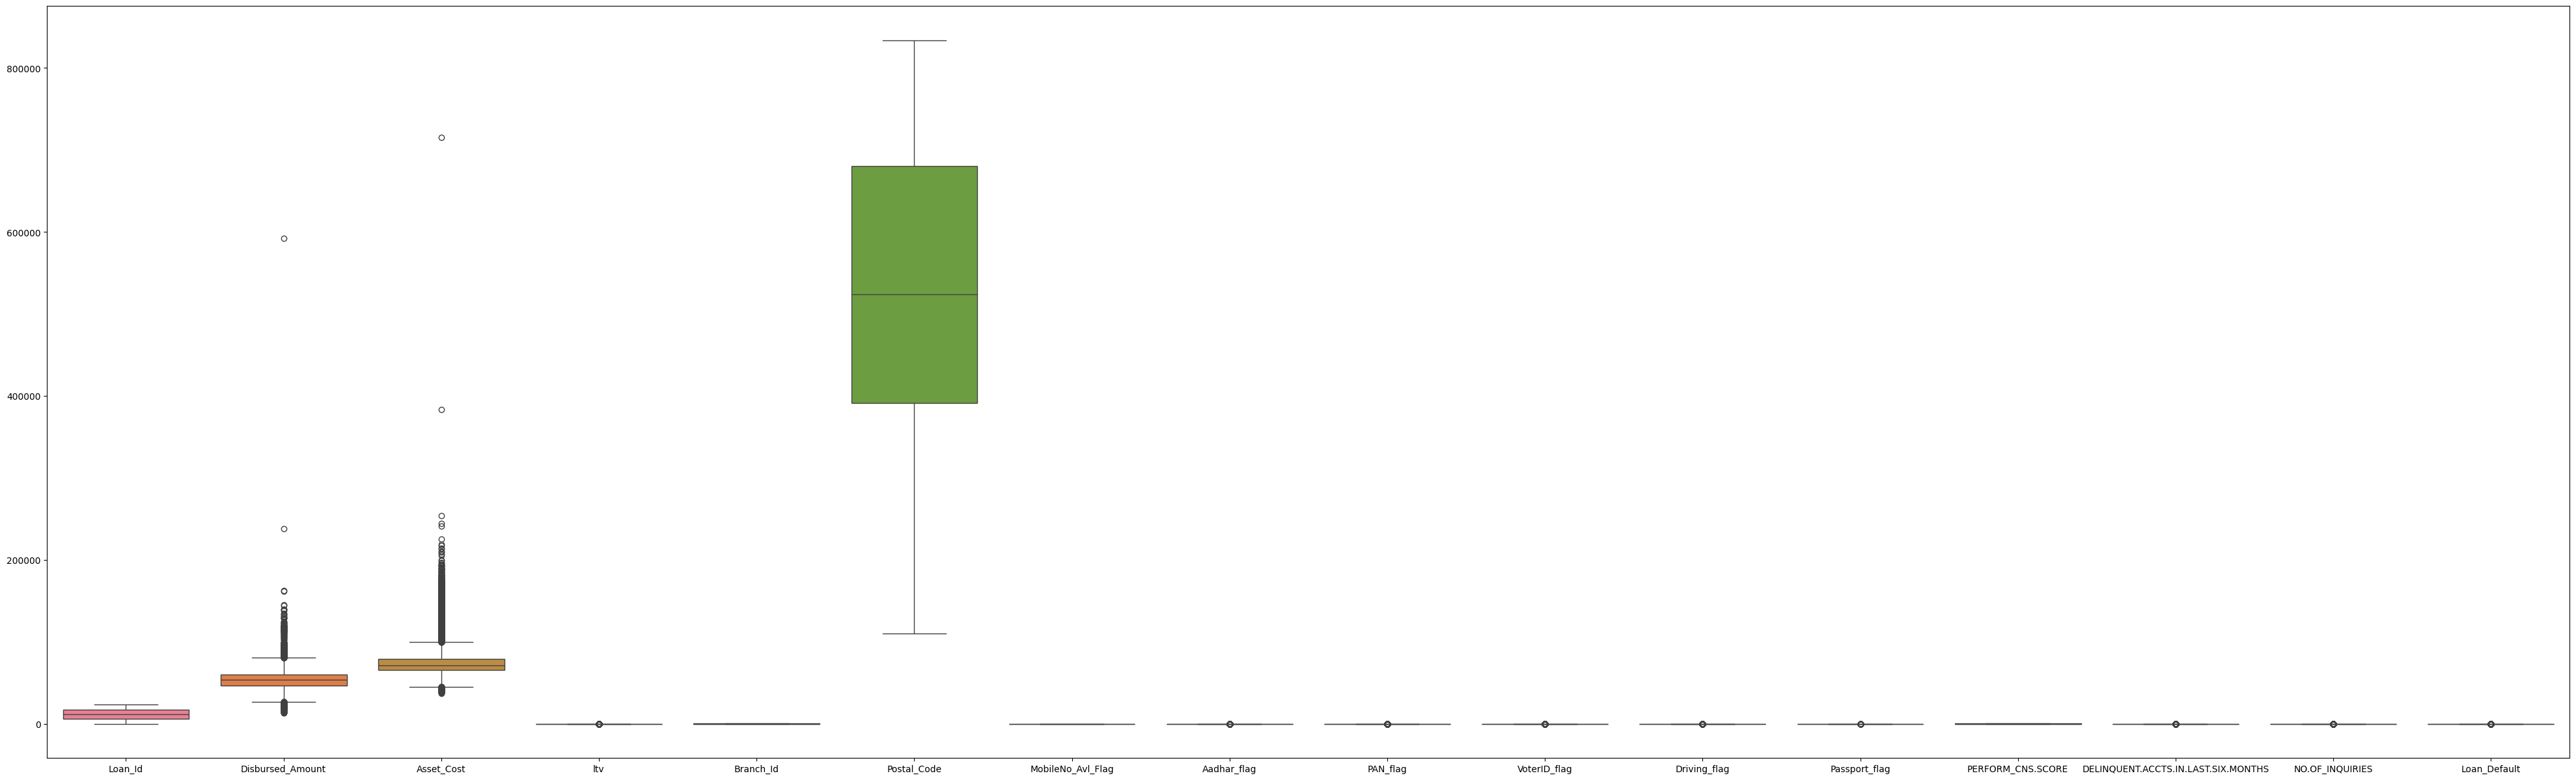

In [98]:
fig, ax = plt.subplots(figsize=(50, 15))
sns.boxplot(loan_details)

## Feature Engineering

#### Outlier detection and handling (Disbursed_Amount)

<Axes: ylabel='Disbursed_Amount'>

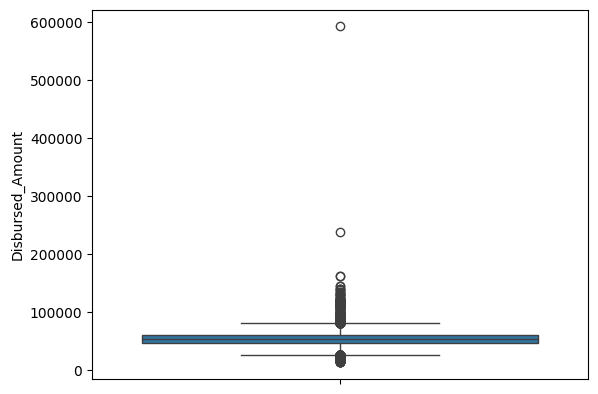

In [99]:
sns.boxplot(loan_details['Disbursed_Amount'])

In [100]:
# Finding number of outliers using the interquantile range

q1 = np.quantile(loan_details['Disbursed_Amount'],0.25)
q3 = np.quantile(loan_details['Disbursed_Amount'],0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
print(lower_bound)
higher_bound = q3 + (1.5* iqr)
print(higher_bound)

median = loan_details['Disbursed_Amount'].median()
print("Median: ",median)
loan_details[(loan_details['Disbursed_Amount'] > higher_bound) | (loan_details['Disbursed_Amount'] < lower_bound)]

26804.0
80524.0
Median:  53759.0


,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,City_Name,State_Name,Region_Code,Region_ID,Loan_Default
30,31,89143,113587,79.85,2,CT29,ST24,632001,18-10-1985,Salaried,...,0,0,0,0yrs 0mon,0,Vellore,Tamil Nadu,R3,R2,0
31,32,96939,145449,68.37,65,CT28,ST11,834008,01-03-1963,Salaried,...,0,694,0,4yrs 5mon,0,Ranchi,Jharkhand,R2,R3,1
33,34,20574,39605,55.55,130,CT22,ST14,453551,09-10-1966,Self employed,...,0,760,0,1yrs 8mon,0,Indore,Madhya Pradesh,R4,R2,0
55,56,26029,62882,42.94,67,CT07,ST13,682001,07-05-1991,Self employed,...,0,738,0,0yrs 6mon,1,Kochi,Kerala,R2,R2,0
106,107,87765,142872,65.09,103,CT24,ST13,680503,01-01-1984,Self employed,...,0,825,0,2yrs 0mon,0,Thrissur,Kerala,R4,R2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23211,23212,97491,180500,55.29,18,CT04,ST24,642205,01-03-1970,Self employed,...,0,300,1,1yrs 3mon,0,Coimbatore,Tamil Nadu,R3,R2,0
23247,23248,25409,65248,41.50,130,CT20,ST28,208002,21-12-1971,Salaried,...,0,0,0,0yrs 0mon,0,kanpur,Uttar Pradesh,R4,R2,0
23274,23275,23074,59354,39.59,3,CT18,ST21,141003,01-01-1982,Salaried,...,0,0,0,0yrs 0mon,0,Ludhiana,Punjab,R3,R1,0
23278,23279,107112,161181,69.49,160,CT24,ST13,680503,01-01-1994,Salaried,...,0,619,0,3yrs 8mon,0,Thrissur,Kerala,R1,R2,0


In [101]:
def replace(data,median):
    cleaned_data = [median if val < lower_bound or val > higher_bound else val for val in data]
    return cleaned_data

In [102]:
new_disbursed = pd.DataFrame(replace(loan_details['Disbursed_Amount'] , median))
new_disbursed

,0
0,36439.0
1,48749.0
2,55348.0
3,48849.0
4,40394.0
...,...
23310,53759.0
23311,78879.0
23312,49349.0
23313,70897.0


In [103]:
del loan_details['Disbursed_Amount']

In [104]:
loan_details.insert(1, 'Disbursed_Amount',new_disbursed)

<Axes: ylabel='Disbursed_Amount'>

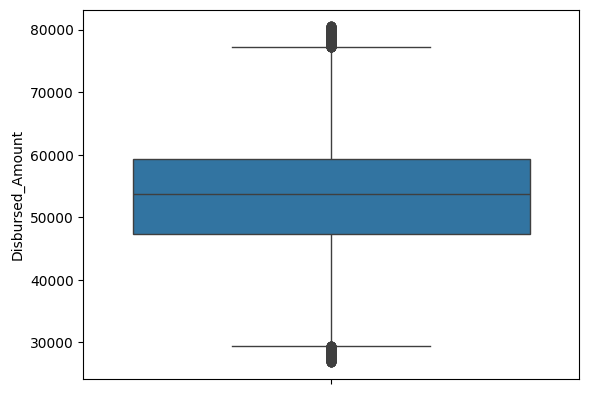

In [105]:
sns.boxplot(loan_details['Disbursed_Amount'])

#### Outlier detection and handling (Asset_cost)

In [106]:
q1 = np.quantile(loan_details['Asset_Cost'],0.25)
q3 = np.quantile(loan_details['Asset_Cost'],0.75)
iqr = q3 - q1
lower_asset = q1 - (1.5 * iqr)
print(lower_asset)
higher_asset = q3 + (1.5* iqr)
print(higher_asset)
print(loan_details['Asset_Cost'].median())

45040.75
99942.75
70929.0


In [107]:
def replace(data,median):
    cleaned_data = [median if val < lower_asset or val > higher_asset else val for val in data]
    return cleaned_data

new_asset = pd.DataFrame(replace(loan_details['Asset_Cost'] , median))

In [108]:
del loan_details['Asset_Cost']

In [109]:
loan_details.insert(2, 'Asset_Cost',new_asset)

<Axes: ylabel='Asset_Cost'>

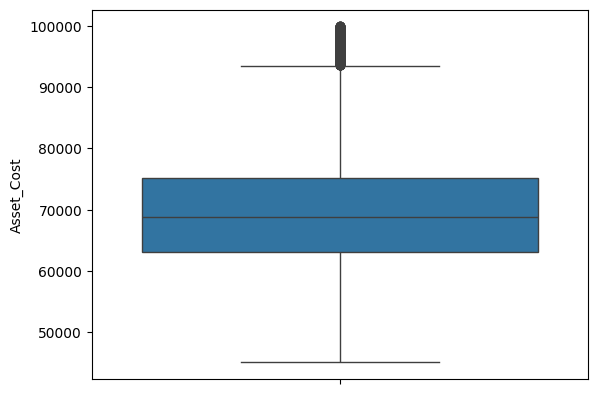

In [110]:
sns.boxplot(loan_details['Asset_Cost'])

#### Changing the date to month in CREDIT.HISTORY.LENGTH

In [111]:
def convert(i):
    parts = i.split()
    year = ''
    month = ''
    for j in parts[0]:
        if j == '0' or j == '1' or j == '2' or j == '3' or j == '4' or j == '5' or j == '6' or j == '7' or j == '8' or j == '9':
            year = year +j
    year = int(year)
    for j in parts[1]:
        if j == '0' or j == '1' or j == '2' or j == '3' or j == '4' or j == '5' or j == '6' or j == '7' or j == '8' or j == '9':
            month =month + j
    month = int(month)
    return (year * 12) + month
data1 = loan_details['CREDIT.HISTORY.LENGTH'].tolist()
months = [convert(i) for i in data1]
new = pd.DataFrame(months)

loan_details.drop(['CREDIT.HISTORY.LENGTH'] , axis = 1 ,inplace = True)
loan_details.insert(16, 'CREDIT.HISTORY.LENGTH',new)

#### Changing the Date_of_Birth into year

In [112]:
loan_details['Date_of_Birth']=pd.to_datetime(loan_details.Date_of_Birth)
loan_details['Date_of_Birth']=loan_details['Date_of_Birth'].dt.year
loan_details=loan_details.drop('DisbursalDate',axis=1)

In [113]:
loan_details['Region_ID'].fillna(loan_details['Region_ID'].mode()[0],inplace=True)

## Label encoding

In [114]:
columns = loan_details.columns
object_columns = []
for column in columns:
    if(loan_details[column].dtype == 'object'):
        object_columns.append(column)
        
binary_columns = []
odinary_columns = []
for column in object_columns:
    if(loan_details[column].unique().all() in ['yes','no']):
        binary_columns.append(column)
    else:
        odinary_columns.append(column)

In [115]:
encoder = OrdinalEncoder()
loan_details[odinary_columns] = encoder.fit_transform(loan_details[odinary_columns])

In [116]:
loan_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Loan_Id                              23315 non-null  int64  
 1   Disbursed_Amount                     23315 non-null  float64
 2   Asset_Cost                           23315 non-null  float64
 3   ltv                                  23315 non-null  float64
 4   Branch_Id                            23315 non-null  int64  
 5   City_Code                            23315 non-null  float64
 6   State_Code                           23315 non-null  float64
 7   Postal_Code                          23315 non-null  int64  
 8   Date_of_Birth                        23315 non-null  int32  
 9   Employment_Type                      23315 non-null  float64
 10  MobileNo_Avl_Flag                    23315 non-null  int64  
 11  Aadhar_flag                 

In [117]:
loan_details=loan_details.drop(['MobileNo_Avl_Flag'],axis=1)

## Correlation

In [118]:
corrs = loan_details.corr()
corrs

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,CREDIT.HISTORY.LENGTH,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,City_Name,State_Name,Region_Code,Region_ID,Loan_Default
Loan_Id,1.000000,-0.007721,0.000384,-0.005458,0.001564,0.001873,0.002888,-0.005249,0.003511,0.005301,...,0.008019,-0.004154,0.003165,-0.002406,-0.005668,-0.003504,-0.003665,-0.006246,-0.006740,-0.010647
Disbursed_Amount,-0.007721,1.000000,0.322280,0.433322,0.010959,0.021990,0.004895,0.001069,0.054789,-0.032558,...,0.003972,0.002673,0.003902,0.013597,0.027403,0.007503,0.008068,0.038746,-0.002739,0.075647
Asset_Cost,0.000384,0.322280,1.000000,-0.001944,-0.028959,-0.001735,0.004503,-0.006236,0.019801,0.000697,...,-0.011595,0.001520,-0.021882,-0.009457,-0.028874,-0.005786,0.003026,0.041122,-0.001408,0.000792
ltv,-0.005458,0.433322,-0.001944,1.000000,0.010844,0.004058,-0.005079,0.008034,-0.077652,-0.116211,...,0.048224,0.010548,0.088537,0.038652,0.087960,0.000355,-0.004932,0.006386,0.012643,0.095423
Branch_Id,0.001564,0.010959,-0.028959,0.010844,1.000000,0.000068,-0.002901,0.007105,-0.001362,-0.019156,...,-0.003680,-0.011556,-0.016329,-0.004391,0.000974,0.013887,-0.003529,-0.367457,-0.008808,0.037361
City_Code,0.001873,0.021990,-0.001735,0.004058,0.000068,1.000000,-0.296162,0.186823,-0.002221,0.006119,...,-0.004466,-0.004383,-0.017176,-0.009526,-0.003734,0.285891,-0.227060,-0.005250,-0.047981,0.009881
State_Code,0.002888,0.004895,0.004503,-0.005079,-0.002901,-0.296162,1.000000,-0.384892,0.008954,0.002671,...,0.001680,0.002763,0.008011,0.011502,0.000288,-0.174014,0.823845,0.000655,-0.450378,-0.008955
Postal_Code,-0.005249,0.001069,-0.006236,0.008034,0.007105,0.186823,-0.384892,1.000000,0.005433,-0.000331,...,-0.000183,-0.004754,-0.009647,-0.004596,-0.001657,-0.013887,-0.177886,0.001086,0.191632,0.005680
Date_of_Birth,0.003511,0.054789,0.019801,-0.077652,-0.001362,-0.002221,0.008954,0.005433,1.000000,-0.043510,...,-0.287536,0.008553,-0.168750,-0.077214,-0.011160,0.000847,0.007242,0.017788,-0.007368,0.037312
Employment_Type,0.005301,-0.032558,0.000697,-0.116211,-0.019156,0.006119,0.002671,-0.000331,-0.043510,1.000000,...,-0.013064,-0.007246,-0.055583,0.008984,-0.005701,0.003343,0.002522,-0.034312,0.003476,0.030252


<Axes: >

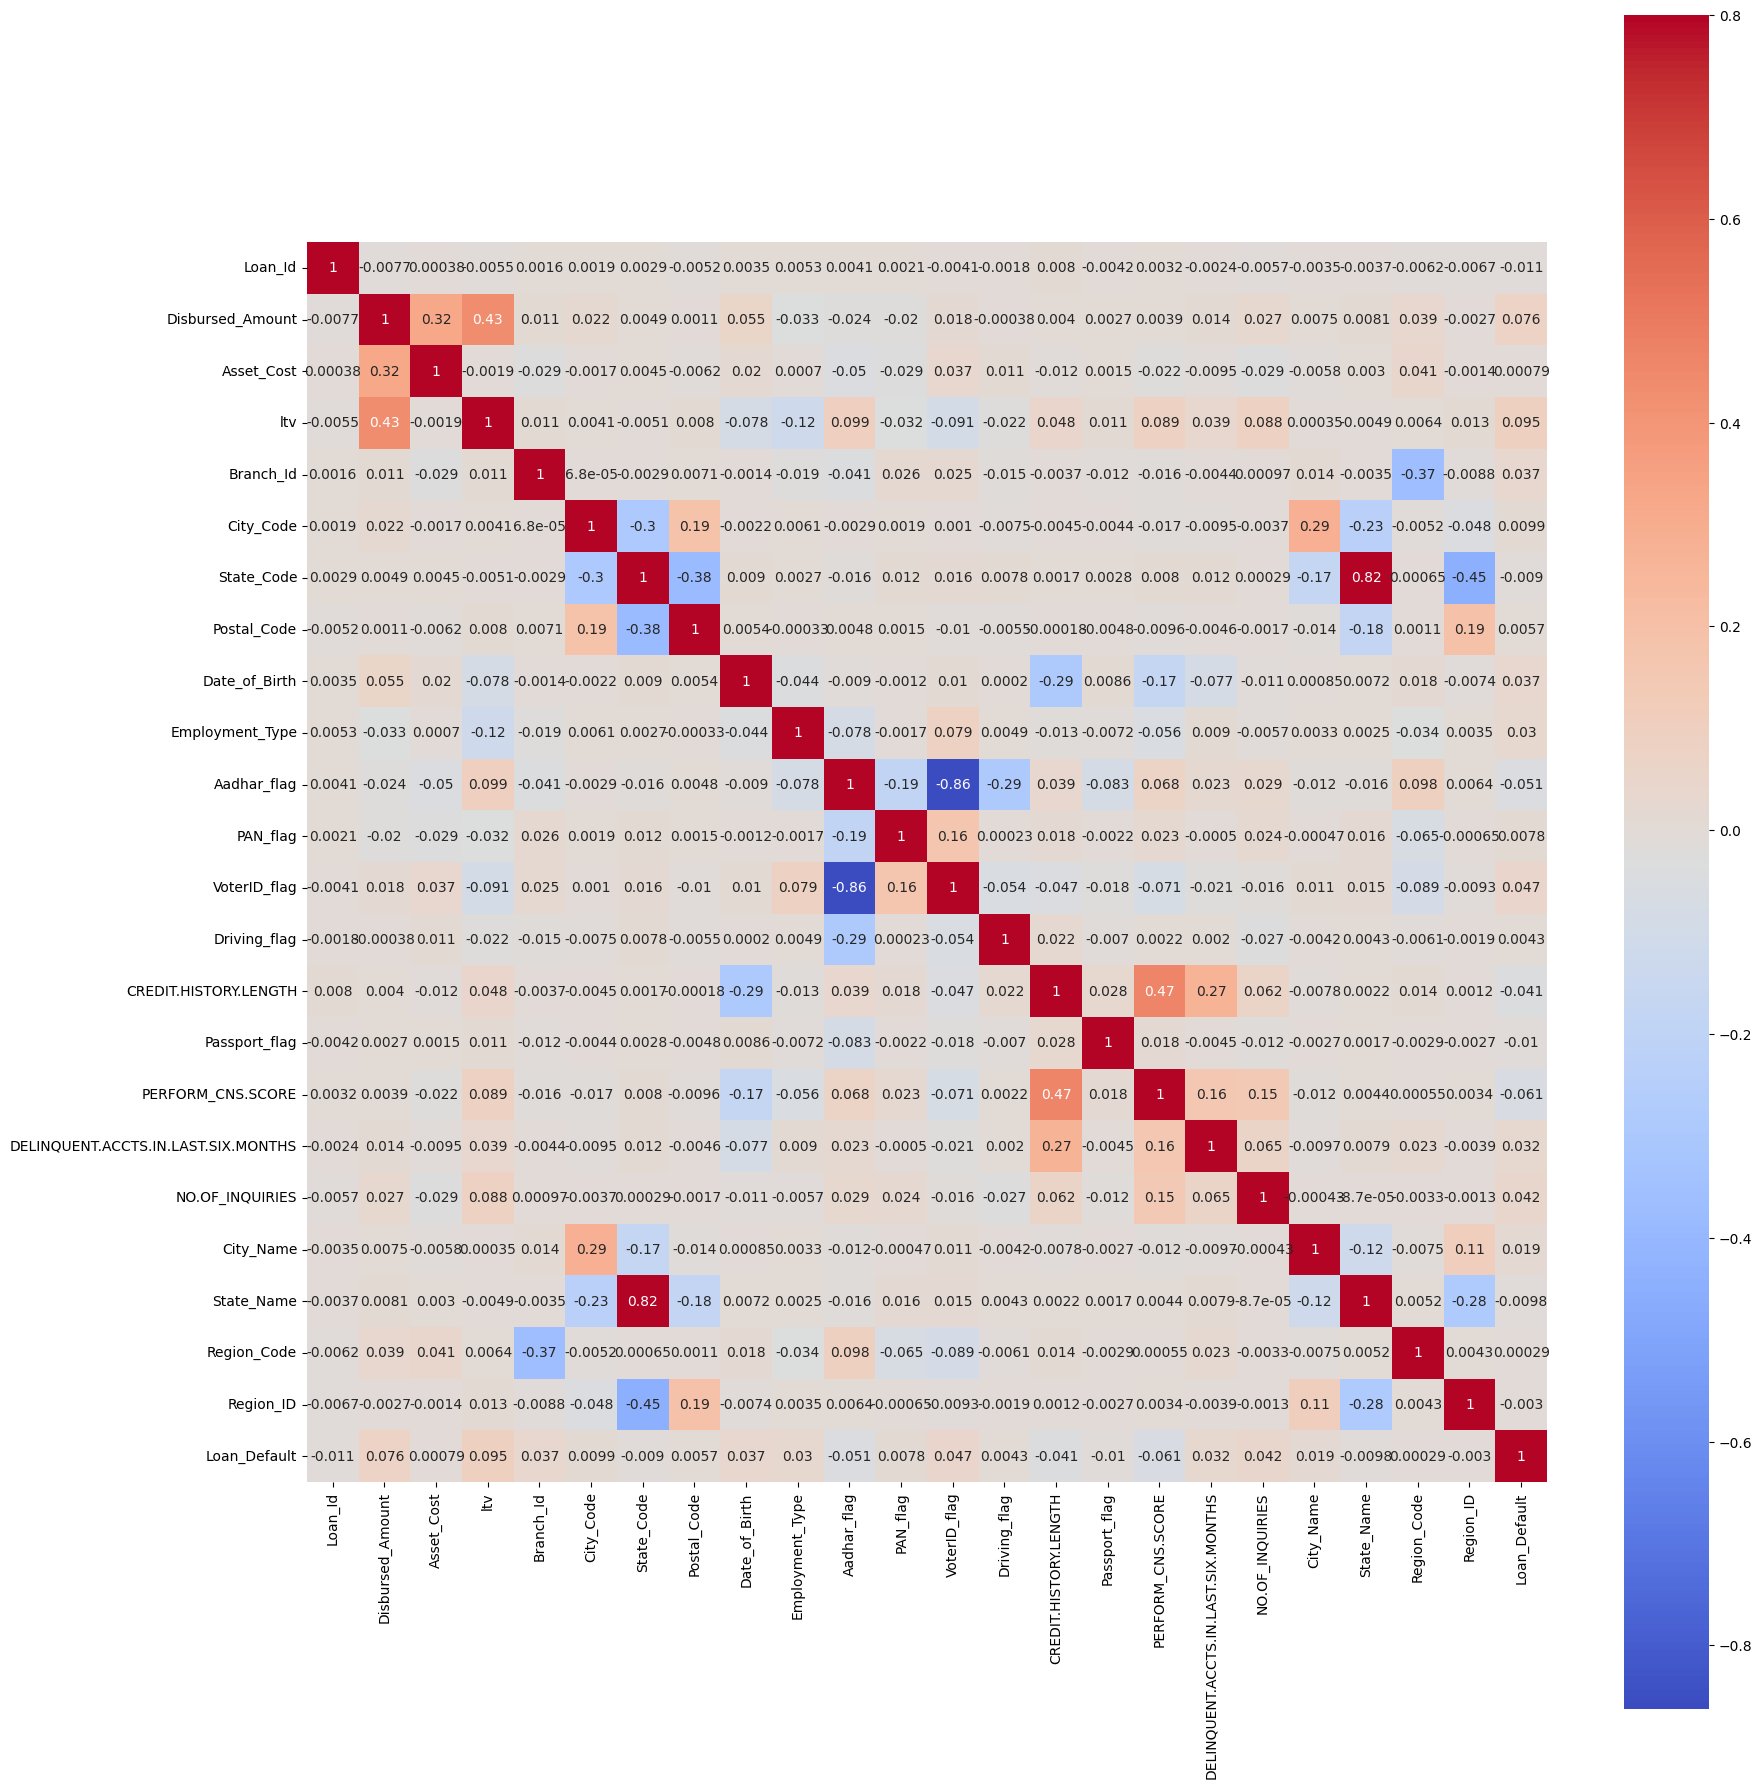

In [119]:
matrix = loan_details.corr()
plt.subplots(figsize=(20,22))
sns.heatmap(matrix,vmax=.8,square=True,cmap='coolwarm', annot = True)

## CheckPoint 2

#### Task 2.1 (Visualization using Power-BI Dashboard)
#### Task 2.2 (Model building using ML algorithms)

## Hypothethis Testing

#### Hypothesis 1 : The average credit history length of borrowers who own a passport is significantly different from those who don't have

In [120]:
loan_details['Passport_flag'].value_counts()

Passport_flag
0    23267
1       48
Name: count, dtype: int64

In [121]:
credit_history_passport = loan_details[loan_details['Passport_flag'] == 1]['CREDIT.HISTORY.LENGTH']
credit_history_passport.shape

(48,)

In [122]:
credit_history_no_passport = loan_details[loan_details['Passport_flag'] == 0]['CREDIT.HISTORY.LENGTH']
credit_history_no_passport.shape

(23267,)

In [123]:
## First we will calculate mean and std. deviation for the customer havng passport
mean_credit_history_passport = credit_history_passport.mean()
std_credit_history_passport = credit_history_passport.std()

## Then we will calculate the mean and std. deviation of customer not having passport
mean_credit_history_no_passport = credit_history_no_passport.mean()
std_credit_history_no_passport = credit_history_no_passport.std()

In [124]:
# We perform the t-test for independent samples
t_stat, p_value = stats.ttest_ind(credit_history_passport, credit_history_no_passport, equal_var=False)

# We determine the significance of the test and interpret the results
alpha = 0.05 

In [125]:
print(f"Mean Credit History Length for Borrowers with Passport: {mean_credit_history_passport:.2f}")
print(f"Mean Credit History Length for Borrowers without Passport: {mean_credit_history_no_passport:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Mean Credit History Length for Borrowers with Passport: 33.88
Mean Credit History Length for Borrowers without Passport: 16.22
T-statistic: 2.82
P-value: 0.0070


#### Checking the hypothesis

In [126]:
if p_value < alpha:
    print("The p-value is less than the significance level, Reject the null hypothesis.")
else:
    print("The p-value is greater than the significance level, Fail to reject the null hypothesis.")

The p-value is less than the significance level, Reject the null hypothesis.


#### Hypothesis 2 : There is a significant difference in the mean ltv(loan to value ratio) between Self-employed borrowers and Salaried borrowers

In [127]:
loan_details['Employment_Type'].value_counts()

Employment_Type
1.0    13494
0.0     9821
Name: count, dtype: int64

In [128]:
ltv_self_employed = loan_details[loan_details['Employment_Type'] == 0]['ltv']
ltv_self_employed.shape

(9821,)

In [129]:
ltv_salaried = loan_details[loan_details['Employment_Type'] == 1]['ltv']
ltv_salaried.shape

(13494,)

In [130]:
mean_ltv_self_employed = ltv_self_employed.mean()
std_ltv_self_employed = ltv_self_employed.std()

In [131]:
mean_ltv_salaried = ltv_salaried.mean()
std_ltv_salaried = ltv_salaried.std()

In [132]:
t_stat, p_value = stats.ttest_ind(ltv_self_employed, ltv_salaried, equal_var=False)
alpha = 0.05

In [133]:
print(f"Mean ltv for Self-employed: {mean_ltv_self_employed:.2f}")
print(f"Mean ltv for Salaried: {mean_ltv_salaried:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Mean ltv for Self-employed: 76.26
Mean ltv for Salaried: 73.57
T-statistic: 18.07
P-value: 0.0000


#### Checking the hypothethis

In [134]:
if p_value < alpha:
    print("The p-value is less than the significance level . Reject the null hypothesis.")
else:
    print("The p-value is greater than the significance level . Fail to reject the null hypothesis.")

The p-value is less than the significance level . Reject the null hypothesis.


## Model Creation and Model Evaluation

In [135]:
# Segregation the data in two parts X and y
new_loan_details = loan_details
X = new_loan_details.drop(columns=['Loan_Default'],axis=1)   # independent variable
y = new_loan_details['Loan_Default']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

#### Logistic Regression Model

In [136]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [137]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score (X_train_prediction,y_train)
print('Accuracy score on training data : ',training_data_accuracy)

Accuracy score on training data :  0.7801470588235294


In [138]:
# accuracy score on test data
X_test_prediction = model.predict(X_test)
accuracy = accuracy_score (X_test_prediction,y_test)
print('Accuracy score on test data:',accuracy)

Accuracy score on test data: 0.7801286633309507


#### Logistic Regression Evaluation

In [139]:
cnf_matrix=confusion_matrix(y_test, X_test_prediction)
cnf_matrix

array([[5457,    0],
       [1538,    0]])

In [140]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5457
           1       0.00      0.00      0.00      1538

    accuracy                           0.78      6995
   macro avg       0.39      0.50      0.44      6995
weighted avg       0.61      0.78      0.68      6995



In [141]:
TN,FP,FN,TP=cnf_matrix.ravel()
print(TN,FP,FN,TP)
linear_test_data_accuracy=accuracy_score(y_test, X_test_prediction)
print('Accuracy_score',linear_test_data_accuracy )

5457 0 1538 0
Accuracy_score 0.7801286633309507


#### K-Fold

In [142]:
# Initialize KFold with the desired number of splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)
smote=SMOTE(sampling_strategy='auto',random_state=42)
LR = LogisticRegression()

# perform k-fold cross-validation using  logistic regression
LR_metric=cross_val_score(LR,X,y,cv=kf)
print(LR_metric)

# calculate the average performance
kFold_accuracy=LR_metric.mean()*100.0
print("Accuracy: ",kFold_accuracy)

[0.7787307  0.77487136 0.77530017 0.77058319 0.78859348 0.79279279
 0.78035178 0.78249678 0.77649078 0.78120978]
Accuracy:  78.0142081557176


#### Smote

In [143]:
X = new_loan_details.drop(columns=['Loan_Default'],axis=1)   # independent variable
y = new_loan_details['Loan_Default']

In [144]:
# Generate a synthetic imbalanced dataset
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Before applying smote method: ',X_train.shape)
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print('After applying smote method: ',X_train_resampled.shape)
# Train a model on the resampled training data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Before applying smote method:  (16320, 23)
After applying smote method:  (25518, 23)
Accuracy: 0.5694067190850608


In [145]:
cnf_matrix=confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3126, 2304],
       [ 708,  857]])

#### Smote Evaluation

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.58      0.67      5430
           1       0.27      0.55      0.36      1565

    accuracy                           0.57      6995
   macro avg       0.54      0.56      0.52      6995
weighted avg       0.69      0.57      0.61      6995



In [147]:
TN,FP,FN,TP=cnf_matrix.ravel()
print(TN,FP,FN,TP)
smote_Accuracy = accuracy_score(y_test, y_pred)
print('Accuracy_score: ',smote_Accuracy )

3126 2304 708 857
Accuracy_score:  0.5694067190850608


## Result

In [148]:
print('Accuracy by Linear Regression: ',round(linear_test_data_accuracy*100,3))
print('Accuracy by Linear Regression with smote : ',round(smote_Accuracy*100,3))
print('Accuracy by KFold: ',round(kFold_accuracy,3))

Accuracy by Linear Regression:  78.013
Accuracy by Linear Regression with smote :  56.941
Accuracy by KFold:  78.014
